<a href="https://colab.research.google.com/github/Galatonic-rebel/GenAI/blob/main/GenAI_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 229kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.27MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.38MB/s]


<function matplotlib.pyplot.show(close=None, block=None)>

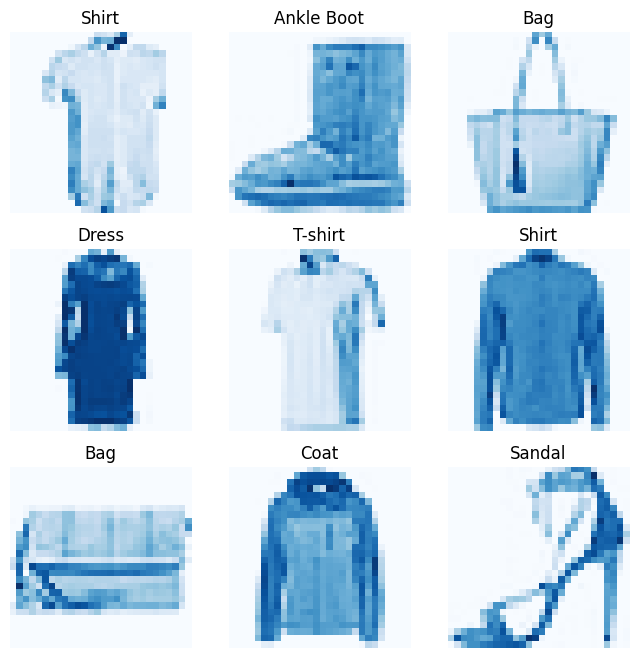

In [ ]:
# Indexing dataset

labels_map ={
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"
}

# Visualizing samples
fig = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range (1, cols*rows + 1):
  sample_index = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_index]
  fig.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="Blues")
plt.show

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  # Number of samples in the dataset
  def __len__(self):
    return len(self.img_labels)

  # Load and return sample
  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

In [ ]:
# DataLoader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataLoader = DataLoader(test_data, batch_size=64, shuffle=True)

feature batch shape: torch.Size([64, 1, 28, 28])
labels batch shape: torch.Size([64])


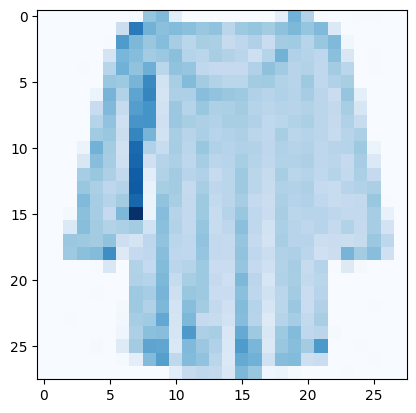

label: 2


In [ ]:
# Display image and label

train_features, train_labels = next(iter(train_dataloader))
print(f"feature batch shape: {train_features.size()}")
print(f"labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="Blues")
plt.show()
print(f"label: {label}")

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform= Lambda(lambda y: torch.zeros(10, dtype= torch.float).scatter_(0, torch.tensor(y),value=1))
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 298kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.52MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.6MB/s]


In [ ]:
# Building model

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self, x):
      x = self.flatten(x)
      logits = self.linear_relu_stack(x)
      return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)
print(f"This is the logits: {logits}")
print(f"Predicted probabilities: {pred_prob}")
print(f"Predicted class: {y_pred}")

This is the logits: tensor([[ 0.0804, -0.0423,  0.0067,  0.0884,  0.0343, -0.0275, -0.0629, -0.0867,
         -0.0379, -0.0645]], grad_fn=<AddmmBackward0>)
Predicted probabilities: tensor([[0.1094, 0.0968, 0.1016, 0.1103, 0.1045, 0.0982, 0.0948, 0.0926, 0.0972,
         0.0946]], grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([3])


In [ ]:
# Importing necessary libraries

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


# Setting the data
train = datasets.FashionMNIST(
    root ="data",
    train = True,
    download = True,
    transform = ToTensor()
)

test = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

train_dataloader = DataLoader(train, batch_size=64)
test_dataLoader = DataLoader(test, batch_size=64)

# Model building
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
      x = self.flatten(x)
      logits = self.linear_relu_stack(x)
      return logits

model = NeuralNetwork()

In [ ]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
# Initializing loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# Optimization

def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate (dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    # Calculating accuracy
    if batch % 100 == 0:
      loss, current = loss.item(), batch*batch_size + len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  model.eval()
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /=num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")



In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
epochs=10
for t in range(epochs):
  print(f"Epoch {t+1}\n------------------------------")
  train_loop(train_dataloader, model, loss_fn, optimizer)
  test_loop(test_dataLoader, model, loss_fn)
print("Dooone!")

Epoch 1
------------------------------
loss: 2.299220 [   64/60000]
loss: 2.292693 [ 6464/60000]
loss: 2.282175 [12864/60000]
loss: 2.272851 [19264/60000]
loss: 2.251174 [25664/60000]
loss: 2.234328 [32064/60000]
loss: 2.232296 [38464/60000]
loss: 2.206249 [44864/60000]
loss: 2.198394 [51264/60000]
loss: 2.167816 [57664/60000]
Test Error: 
 Accuracy: 51.4%, Avg loss: 2.166793

Epoch 2
------------------------------
loss: 2.172328 [   64/60000]
loss: 2.170067 [ 6464/60000]
loss: 2.116585 [12864/60000]
loss: 2.127873 [19264/60000]
loss: 2.087381 [25664/60000]
loss: 2.030290 [32064/60000]
loss: 2.054755 [38464/60000]
loss: 1.981117 [44864/60000]
loss: 1.976418 [51264/60000]
loss: 1.910551 [57664/60000]
Test Error: 
 Accuracy: 61.7%, Avg loss: 1.909840

Epoch 3
------------------------------
loss: 1.936668 [   64/60000]
loss: 1.917032 [ 6464/60000]
loss: 1.796414 [12864/60000]
loss: 1.831836 [19264/60000]
loss: 1.747038 [25664/60000]
loss: 1.682390 [32064/60000]
loss: 1.707625 [38464/60000